<a href="https://colab.research.google.com/github/renatachavezm22/Evaluacion/blob/main/Evaluacion_(Completo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación**

#### Renata Emilia Chávez Martínez


In [ ]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
#from google.colab import files
#files.upload()

In [ ]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("DF_Mexico (2).csv")
EUA = pd.read_csv("California_EUA.csv", encoding='unicode_escape')
Espana = pd.read_csv("Girona_España.csv", encoding='unicode_escape')

In [ ]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=ab93a5e68da50b7c22d3bb24006fff6214322084b9ba83dd25c6581a0c40e015
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
from funpymodeling.exploratory import freq_tbl 

## **Etapa 1**

### **EUA**

#### **Limpieza de los datos**

In [ ]:
EUA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [ ]:
valores_nulos1=EUA.isnull().sum()
print(valores_nulos1)

ï»¿id                                              0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1325
Length: 75, dtype: int64


In [ ]:
valores_nulost=EUA.isnull().sum().sum()
print(valores_nulost)

48877


Como podemos ver en la base de datos tenemos 48,877 datos nulos los cuales nos afecatran en la investigación que realizamos. Primeramente hare una limpieza del DataFrame, esta para limpiar aquellos datos númericos con la media (considerando que esta función aritmetica nos dice un comportamiento regular de la columan). Posteriormente, usaremos el metodo que utilice valores previos como indicadores o como sustitutos para valores NaN considerando que puede ser la moda que se tenga por parte de la columna

In [ ]:
EUA1=EUA.copy()

In [ ]:
EUA1=EUA1.fillna(round(EUA.mean(),1))
EUA1.isnull().sum().sum()

<ipython-input-11-c00d2d475587>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EUA1=EUA1.fillna(round(EUA.mean(),1))


37071

In [ ]:
EUA1=EUA1.fillna(method='bfill')
EUA1.isnull().sum().sum()

20821

In [ ]:
nulos = EUA1.isnull().any()
print(EUA1.loc[:,nulos])

                                             host_about host_acceptance_rate  \
0     We are a family of four that live upstairs.  W...                 100%   
1     Philip: English transplant to the Bay Area and...                  71%   
2     7 minutes walk to UCSF hospital & school campu...                  73%   
3     I'm an Interior Stylist living in SF. \r\n\r\n...                   0%   
4     Ivan is a publisher of a book for 4 year olds....                  90%   
...                                                 ...                  ...   
6931                                                NaN                 100%   
6932                                                NaN                  50%   
6933                                                NaN                  50%   
6934                                                NaN                  50%   
6935                                                NaN                  NaN   

      neighbourhood_group_cleansed  bat

Vemos que tenemos 3 columnas que las cuales tenemos demasiados valores NaN, viendo y analizando a fondo dichas columnas vemos que podemos hacer una limpieza singular a cada una de esas en las cuales sustituiremos los valores NaN respectivamente a los valores que creemos indicados.

En la parte de neighbour_group_cleansed, vemos que llega a ser inclusive una columna conjunta a la de neighbourhood_cleansedneigh por lo cual eliminaremos dicha columna.

En la de los baños tomaremos los valores de la columan de a lado y usando lambda utilizaremos una expresión regular para eliminar todas las letras. 

En la tercer columna vemos que no tiene valores, por lo cual la eliminaremos.



In [ ]:
EUA1=EUA1.drop(['neighbourhood_group_cleansed', 'calendar_updated'], axis=1)
EUA1.isnull().sum().sum()

6949

In [ ]:
import re
EUA1['bathrooms']=EUA1['bathrooms'].fillna(EUA1['bathrooms_text'])
EUA1['bathrooms'] = EUA1['bathrooms'].apply(lambda x: re.sub('[^0-9]', '', x))
EUA1['bathrooms']

0        1
1        1
2        4
3       15
4        1
        ..
6931     1
6932     1
6933     1
6934     1
6935     1
Name: bathrooms, Length: 6936, dtype: object

In [ ]:
EUA1.isnull().sum().sum()

13

Como podemos ver ya no tenemos datos nulos considerando que eliminamos dos columnas que una no tenia relevancia considerando que otra ya tenia el contenido y una que no tenia información alguna. La de baños decidí hacer todo el procedimiento de tomar la de texto considerando que será necesario para la segunda parte de esta evaluación.

In [ ]:
EUA1=EUA1.dropna(axis=0)
EUA1.isnull().sum().sum()

0

In [ ]:
EUA1

,ï»¿id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5.858000e+03,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,STR-0000264,f,1,1,0,0,0.66
2,8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,STR-0000264,f,13,0,13,0,0.09
3,8.339000e+03,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,8.170000e+17,https://www.airbnb.com/rooms/817067809700979706,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 8,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,4.56,4.89,2022-012006STR,f,7,0,7,0,8.44
6927,8.170000e+17,https://www.airbnb.com/rooms/817390268252267687,2.020000e+13,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,486687635,...,5.00,5.00,5.00,Exempt,f,26,0,26,0,1.00
6928,8.180000e+17,https://www.airbnb.com/rooms/817535225433481370,2.020000e+13,06/03/2023,city scrape,Unique custom loft - South Beach,Historical loft building in safe+clean South B...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,9835117,...,4.90,4.80,4.70,147904,f,1,1,0,0,1.30
6929,8.180000e+17,https://www.airbnb.com/rooms/817686120681200035,2.020000e+13,06/03/2023,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,226555948,...,4.90,4.80,4.70,147904,f,14,3,11,0,1.30


#### **Eliminación de Outliers (Rango Intercuartílico)**

Haciendo diversas actividades así como desarrollando este modelo es que considero que el método de eliminación de outliers considerando que este es un modelo mucho más robusto que el de desviación consisderanod que este puede manejar mejor esos valores atipicos que se tienen dado que tomamos los valores que están por debajo del primer cuartil menos 1.5 veces el rango intercuartílico o por encima del tercer cuartil más 1.5 veces el rango intercuartílico se consideran outliers.

Primeramente solo checaremos los datos númericos y después haremos una visualización de los datos.

In [ ]:
EUA_int=EUA1.select_dtypes(include=['int64'])
EUA_decimales=EUA1.select_dtypes(include=['float'])
EUA_cuali=EUA1.select_dtypes(include=['object'])

EUA_numeros=pd.concat([EUA_int,EUA_decimales],axis=1)
EUA_numeros.isnull().sum()

host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
ï»¿id                                           0
scrape_id                                       0
latitude                                        0


<Figure size 1500x800 with 0 Axes>

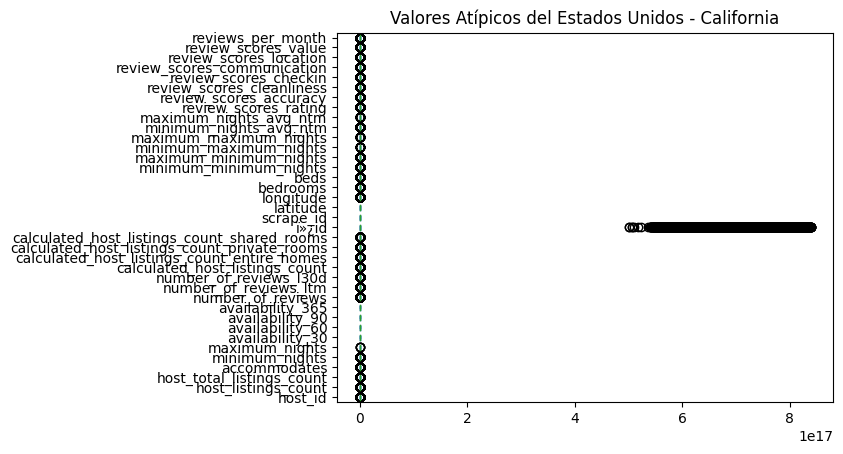

In [ ]:
fig1 = plt.figure(figsize =(15, 8))
EUA_numeros.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Estados Unidos - California")
plt.show()

Considerando lo anterior vamos a aplicar el método para reducir esto.

In [ ]:
y=EUA_numeros

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_id                                         4.224914e+08
host_listings_count                             3.850000e+01
host_total_listings_count                       5.700000e+01
accommodates                                    7.000000e+00
minimum_nights                                  7.200000e+01
maximum_nights                                  2.769000e+03
availability_30                                 5.750000e+01
availability_60                                 1.235000e+02
availability_90                                 1.860000e+02
availability_365                                6.605000e+02
number_of_reviews                               1.185000e+02
number_of_reviews_ltm                           2.500000e+01
number_of_reviews_l30d                          2.500000e+00
calculated_host_listings_count                  2.100000e+01
calculated_host_listings_count_entire_homes     5.000000e+00
calculated_host_listings_count_private_rooms    5.000000e+0

In [ ]:
#Encontramos Ouliers
outliers= EUA_numeros[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.44,4.44,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44
6927,486687635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6929,NaN,67.0,86.0,NaN,120.0,NaN,NaN,NaN,NaN,NaN,...,118.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
EUA_clean= EUA_numeros[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
EUA_clean

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169.0,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,2.0,1125.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904.0,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,30.0,60.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994.0,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,32.0,90.0,4.67,NaN,NaN,4.78,4.78,4.67,4.67,0.09
3,24215.0,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,9.0,91.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149.0,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,1.0,26.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569.0,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,1.0,365.0,5.00,5.00,4.89,5.00,5.00,4.56,4.89,NaN
6927,NaN,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,1.0,1125.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6928,9835117.0,2.0,7.0,3.0,30.0,365.0,0,0,0,248,...,30.0,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30
6929,226555948.0,NaN,NaN,2.0,NaN,365.0,2,32,62,336,...,NaN,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30


In [ ]:
EUA_cleanf=EUA_clean.copy()
EUA_cleanf=EUA_cleanf.fillna(round(EUA_cleanf.mean(),1))
EUA_cleanf

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169.0,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,2.0,1125.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904.0,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,30.0,60.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994.0,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,32.0,90.0,4.67,4.90,4.90,4.78,4.78,4.67,4.67,0.09
3,24215.0,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,9.0,91.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149.0,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,1.0,26.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569.0,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,1.0,365.0,5.00,5.00,4.89,5.00,5.00,4.56,4.89,0.80
6927,87262817.9,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,1.0,1125.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6928,9835117.0,2.0,7.0,3.0,30.0,365.0,0,0,0,248,...,30.0,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30
6929,226555948.0,5.3,7.7,2.0,15.3,365.0,2,32,62,336,...,15.1,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30


<Figure size 1500x800 with 0 Axes>

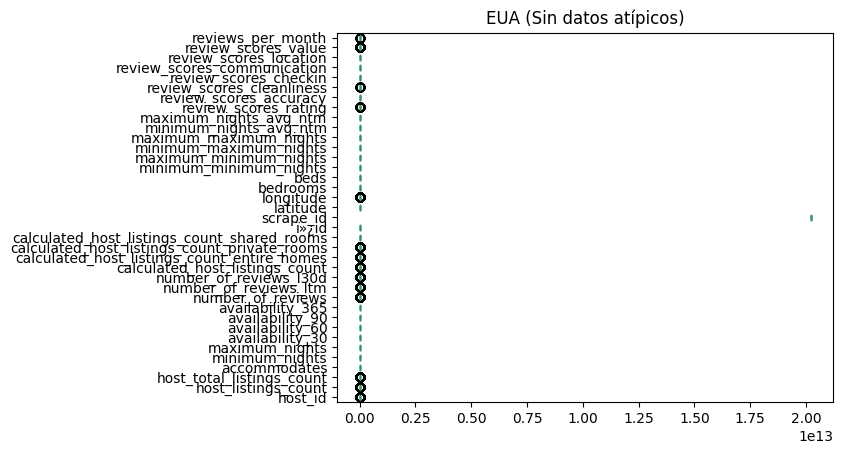

In [ ]:
fig2 = plt.figure(figsize =(15, 8))
EUA_cleanf.plot(kind='box', vert=False)
plt.title("EUA (Sin datos atípicos)")
plt.show() #dibujamos el diagrama

Vemos que la cantidad de valores atipicos disminuyo de manera drástica en la base de datos esto dandonos a entender que limpiamos de manera adecuada los datos. Concatenamos todo el database que se tiene con los numeros y variables cualitativas

In [ ]:
EUA_f=pd.concat([EUA_cleanf, EUA_cuali], axis=1)
EUA_f

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,bathrooms,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169.0,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,1,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,8904.0,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,1,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,STR-0000264,f
2,21994.0,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,4,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,STR-0000264,f
3,24215.0,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,15,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,7149.0,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,1,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569.0,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,15,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$83.00,t,06/03/2023,03/02/2023,25/02/2023,2022-012006STR,f
6927,87262817.9,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,1,1 private bath,"[""Security cameras on property"", ""Self check-i...",$80.00,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6928,9835117.0,2.0,7.0,3.0,30.0,365.0,0,0,0,248,...,1,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",$175.00,f,06/03/2023,03/03/2023,03/03/2023,147904,f
6929,226555948.0,5.3,7.7,2.0,15.3,365.0,2,32,62,336,...,1,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",$40.00,t,06/03/2023,03/03/2023,03/03/2023,147904,f


### **España**

#### **Limpieza de los datos**

In [ ]:
Espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [ ]:
valores_nulos2=Espana.isnull().sum()
print(valores_nulos2)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5227
Length: 75, dtype: int64


In [ ]:
valores_nulost=Espana.isnull().sum().sum()
print(valores_nulost)

174630


En este caso podemos ver que efectivamente tenemos mucho más datos faltantes en cuestion de esta base de datos, así que realizaremos el mismo procedimiento que en el previo DataFrame para poder tener una limpieza similar. Primero daremos un acercamiento global usando la media y el de utilizar valores anteriores en cuestion de los valores cualitativos y posteriormente haremos un análisis fijo a esas columnas con mayor número de NaN o con valores diferentes.

In [ ]:
Espana1=Espana.copy()

In [ ]:
Espana1=Espana1.fillna(round(Espana.mean(),1))
Espana1.isnull().sum().sum()

<ipython-input-31-c35bd171eba2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Espana1=Espana1.fillna(round(Espana.mean(),1))


131634

In [ ]:
Espana1=Espana1.fillna(method='bfill')
Espana1.isnull().sum().sum()

59394

In [ ]:
nulos1 = Espana1.isnull().any()
print(Espana1.loc[:,nulos1])

                                   neighborhood_overview  \
0      MontjuÃ¯c is most likely the best neighborhood...   
1      Bonitas playas a 15 minutos en coche. Piscina ...   
2      Sant Climent is a tiny village, with a populat...   
3      Sant Climent is a tiny village, with a populat...   
4      Apartment located outside the town on a small ...   
...                                                  ...   
19650                                                NaN   
19651                                                NaN   
19652                                                NaN   
19653                                                NaN   
19654                                                NaN   

                      host_location  \
0                     Girona, Spain   
1                   Vidreres, Spain   
2                  Catalonia, Spain   
3      Sant Climent Sescebes, Spain   
4                  CataluÃ±a, Spain   
...                             ...   
19650 

En este casi tenemos las mismas columnas que la pasada sin embargo tenemos 7 columnas más siendo así, 10 columnas las cuales vamos a inspeccionar y así decidir que se tendrá que hacer para que la base de datos quede sin valores nulos y poder hacer el procedimeinto de eliminar Outliers.

En la parte de neighbour_group_cleansed, vemos que llega a ser inclusive una columna conjunta a la de neighbourhood_cleansedneigh por lo cual eliminaremos dicha columna. (Usando la lógica del previo ejercicio)

En la de los baños tomaremos los valores de la columan de a lado y usando lambda utilizaremos una expresión regular para eliminar todas las letras. (Usando la lógica del previo ejercicio)

En la tercer columna vemos que no tiene valores, por lo cual la eliminaremos. (Usando la lógica del previo ejercicio)





In [ ]:
Espana1=Espana1.drop(['neighbourhood_group_cleansed', 'calendar_updated'], axis=1)
Espana1.isnull().sum().sum()

20084

In [ ]:
import re
Espana1['bathrooms']=Espana1['bathrooms'].fillna(Espana1['bathrooms_text'])
Espana1['bathrooms'] = Espana1['bathrooms'].apply(lambda x: re.sub('[^0-9]', '', x))
Espana1['bathrooms']

0         1
1        15
2         1
3         1
4         1
         ..
19650     5
19651     1
19652     1
19653     1
19654     1
Name: bathrooms, Length: 19655, dtype: object

In [ ]:
Espana1.isnull().sum().sum()

429

Considerando que ya realizamos este analisis volveremos a ver las columnas que nos faltan en este caso 7 para ver como haremos las sustitución de los datos.

In [ ]:
nulos1_1 = Espana1.isnull().any()
print(Espana1.loc[:,nulos1_1])

                                   neighborhood_overview  \
0      MontjuÃ¯c is most likely the best neighborhood...   
1      Bonitas playas a 15 minutos en coche. Piscina ...   
2      Sant Climent is a tiny village, with a populat...   
3      Sant Climent is a tiny village, with a populat...   
4      Apartment located outside the town on a small ...   
...                                                  ...   
19650                                                NaN   
19651                                                NaN   
19652                                                NaN   
19653                                                NaN   
19654                                                NaN   

                      host_location  \
0                     Girona, Spain   
1                   Vidreres, Spain   
2                  Catalonia, Spain   
3      Sant Climent Sescebes, Spain   
4                  CataluÃ±a, Spain   
...                             ...   
19650 

Considerando la columna de nieghbourhood usaremos los mismos datos de neighborhood_overview

In [ ]:
Espana1['neighbourhood']=Espana1['neighbourhood'].fillna(Espana1['neighborhood_overview'])
Espana1.isnull().sum().sum()

429

En cuestión de las fechas usare la que viene en last screpped considerando que es mucho máss facil tomar una de la misma fila que de otro portafolio.

In [ ]:
Espana1['first_review']=Espana1['first_review'].fillna(Espana1['last_scraped'])
Espana1['last_review']=Espana1['last_review'].fillna(Espana1['last_scraped'])
Espana1.isnull().sum().sum()

55

Considerando el rango tan bajo de nulos que quedan es que eliminaremos esas filas.

In [ ]:
Espana1=Espana1.dropna(axis=0, how='any')
Espana1.isnull().sum().sum()

0

#### **Eliminación de Outliers (Rango Intercuartílico)**

Haciendo diversas actividades así como desarrollando este modelo es que considero que el método de eliminación de outliers considerando que este es un modelo mucho más robusto que el de desviación consisderanod que este puede manejar mejor esos valores atipicos que se tienen dado que tomamos los valores que están por debajo del primer cuartil menos 1.5 veces el rango intercuartílico o por encima del tercer cuartil más 1.5 veces el rango intercuartílico se consideran outliers.

Primeramente solo checaremos los datos númericos y después haremos una visualización de los datos.

In [ ]:
Espana_int=Espana1.select_dtypes(include=['int64'])
Espana_decimales=Espana1.select_dtypes(include=['float'])
Espana_cuali=Espana1.select_dtypes(include=['object'])

Espana_numeros=pd.concat([Espana_int,Espana_decimales],axis=1)
Espana_numeros.isnull().sum()

host_id                                         0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
id                                              0
scrape_id                                       0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0


<Figure size 1500x800 with 0 Axes>

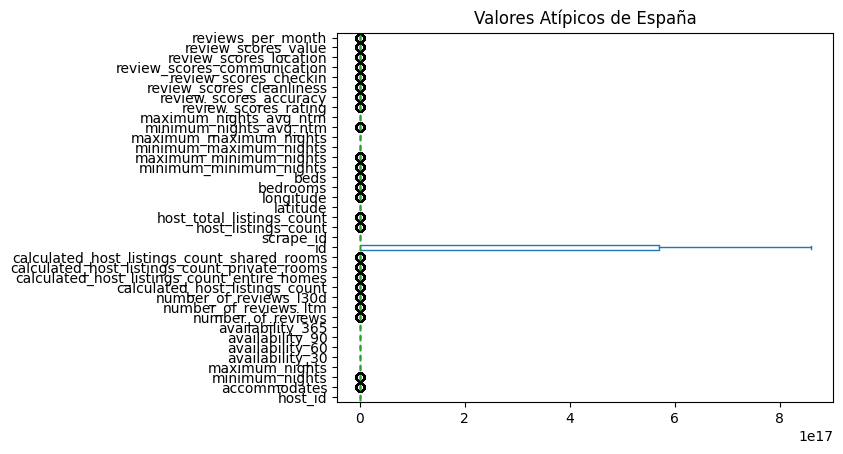

In [ ]:
fig1 = plt.figure(figsize =(15, 8))
Espana_numeros.plot(kind='box', vert=False)
plt.title("Valores Atípicos de España")
plt.show()

Considerando lo anterior vamos a aplicar el método para reducir esto.

In [ ]:
y=Espana_numeros

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_id                                         5.298915e+08
accommodates                                    9.000000e+00
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
availability_30                                 6.750000e+01
availability_60                                 1.270000e+02
availability_90                                 1.700000e+02
availability_365                                5.805000e+02
number_of_reviews                               3.500000e+01
number_of_reviews_ltm                           1.250000e+01
number_of_reviews_l30d                          0.000000e+00
calculated_host_listings_count                  1.285000e+02
calculated_host_listings_count_entire_homes     1.285000e+02
calculated_host_listings_count_private_rooms    0.000000e+00
calculated_host_listings_count_shared_rooms     0.000000e+00
id                                              1.427026e+1

In [ ]:
#Encontramos Ouliers
outliers= Espana_numeros[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
Espana_clean= Espana_numeros[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Espana_clean

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2.0,1.0,1125,0,0,18,293,NaN,NaN,...,1.0,1125.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2.0,2.0,30,9,39,69,282,NaN,2.0,...,2.0,30.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4.0,2.0,30,23,47,77,315,NaN,4.0,...,2.3,29.1,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,2.0,1125.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,7.0,32.0,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,21668566,4.0,1.0,365,0,0,6,77,0.0,0.0,...,5.5,999.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19635,148547858,4.0,1.0,1125,3,33,63,157,0.0,0.0,...,4.7,1125.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19636,151260158,8.0,2.0,365,22,46,69,209,0.0,0.0,...,2.8,365.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19637,192052905,3.0,5.0,90,0,0,29,152,0.0,0.0,...,5.0,90.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50


In [ ]:
Espana_cleanf=Espana_clean.copy()
Espana_cleanf=Espana_cleanf.fillna(round(Espana_cleanf.mean(),1))
Espana_cleanf

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2.0,1.0,1125,0,0,18,293,6.0,2.2,...,1.0,1125.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2.0,2.0,30,9,39,69,282,6.0,2.0,...,2.0,30.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4.0,2.0,30,23,47,77,315,6.0,4.0,...,2.3,29.1,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,2.0,1125.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,7.0,32.0,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,21668566,4.0,1.0,365,0,0,6,77,0.0,0.0,...,5.5,999.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19635,148547858,4.0,1.0,1125,3,33,63,157,0.0,0.0,...,4.7,1125.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19636,151260158,8.0,2.0,365,22,46,69,209,0.0,0.0,...,2.8,365.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19637,192052905,3.0,5.0,90,0,0,29,152,0.0,0.0,...,5.0,90.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50


<Figure size 1500x800 with 0 Axes>

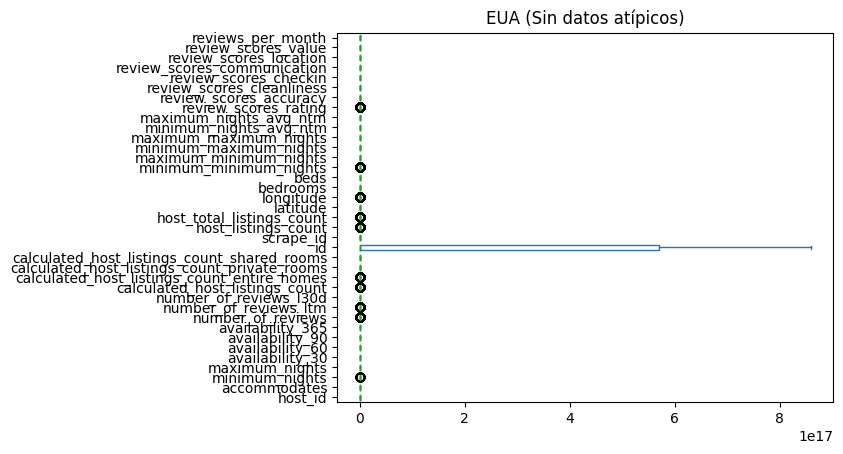

In [ ]:
fig2 = plt.figure(figsize =(15, 8))
Espana_cleanf.plot(kind='box', vert=False)
plt.title("EUA (Sin datos atípicos)")
plt.show() #dibujamos el diagrama

Vemos que la cantidad de valores atipicos disminuyo de manera drástica en la base de datos esto dandonos a entender que limpiamos de manera adecuada los datos. Concatenamos todo el database que se tiene con los numeros y variables cualitativas

In [ ]:
Espana_f=pd.concat([Espana_cleanf,Espana_cuali], axis=1)
Espana_f

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,bathrooms,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,57237,2.0,1.0,1125,0,0,18,293,6.0,2.2,...,1,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,6586355,2.0,2.0,30,9,39,69,282,6.0,2.0,...,15,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",$47.00,t,31/03/2023,01/08/2013,26/06/2022,PG000794,f
2,6620645,4.0,2.0,30,23,47,77,315,6.0,4.0,...,1,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,PG000794,f
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,1,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",$45.00,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,1,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",$120.00,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,21668566,4.0,1.0,365,0,0,6,77,0.0,0.0,...,1,1 bath,"[""Air conditioning"", ""Free parking on premises...",$108.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-068543,t
19635,148547858,4.0,1.0,1125,3,33,63,157,0.0,0.0,...,1,1 bath,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",$60.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-049206,t
19636,151260158,8.0,2.0,365,22,46,69,209,0.0,0.0,...,25,2.5 baths,"[""Kitchen"", ""Iron"", ""Freezer"", ""Dishwasher"", ""...",$293.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-067543,t
19637,192052905,3.0,5.0,90,0,0,29,152,0.0,0.0,...,1,1 bath,"[""Kitchen"", ""Air conditioning"", ""Washer"", ""Fre...",$105.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-043406,f


### **México**

#### **Limpieza de los datos**

In [ ]:
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [ ]:
valores_nulos3=Mexico.isnull().sum()
print(valores_nulos3)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64


In [ ]:
valores_nulost=Mexico.isnull().sum().sum()
print(valores_nulost)

189609


En este caso podemos ver que un comportamiento similar al de España, así que realizaremos el mismo proceso para esta base de datos.

In [ ]:
Mexico1=Mexico.copy()

In [ ]:
Mexico1=Mexico1.fillna(round(Mexico.mean(),1))
Mexico1.isnull().sum().sum()

<ipython-input-53-f1addbdb82e5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mexico1=Mexico1.fillna(round(Mexico.mean(),1))


159672

In [ ]:
Mexico1=Mexico1.fillna(method='bfill')
Mexico1.isnull().sum().sum()

96986

In [ ]:
nulos2 = Mexico1.isnull().any()
print(Mexico1.loc[:,nulos2])

             host_location                                         host_about  \
0      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
1      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
2      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
3      Mexico City, Mexico  Master in visual arts, film photography & Mark...   
4      Mexico City, Mexico  Condesa Haus  is Bed & Breakfast located on th...   
...                    ...                                                ...   
24219  Mexico City, Mexico  Amo viajar y disfrutar de mis viajes y que mej...   
24220  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24221  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24222  Mexico City, Mexico                                                NaN   
24223                  NaN                                                NaN   

      host_response_time ho

En este caso vemos un caso similar al que se tiene en España por lo cual es que haremos el mismo procedimiento en las columnas que ya hemos trabajado.





In [ ]:
Mexico1=Mexico1.drop(['neighbourhood_group_cleansed', 'calendar_updated'], axis=1)
Mexico1.isnull().sum().sum()

48538

In [ ]:
import re
Mexico1['bathrooms']=Mexico1['bathrooms'].fillna(Mexico1['bathrooms_text'])
Mexico1['bathrooms'] = Mexico1['bathrooms'].apply(lambda x: re.sub('[^0-9]', '', x))
Mexico1['bathrooms']

0        15
1         1
2         2
3         1
4        55
         ..
24219     1
24220     1
24221    25
24222     1
24223     1
Name: bathrooms, Length: 24224, dtype: object

In [ ]:
Mexico1.isnull().sum().sum()

24314

In [ ]:
nulos2_1 = Mexico1.isnull().any()
print(Mexico1.loc[:,nulos2_1])

             host_location                                         host_about  \
0      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
1      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
2      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
3      Mexico City, Mexico  Master in visual arts, film photography & Mark...   
4      Mexico City, Mexico  Condesa Haus  is Bed & Breakfast located on th...   
...                    ...                                                ...   
24219  Mexico City, Mexico  Amo viajar y disfrutar de mis viajes y que mej...   
24220  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24221  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24222  Mexico City, Mexico                                                NaN   
24223                  NaN                                                NaN   

      host_response_time ho

Considerando la columna de nieghbourhood usaremos los mismos datos de neighborhood_overview

In [ ]:
Mexico1['host_neighbourhood']=Mexico1['host_neighbourhood'].fillna(Mexico1['neighbourhood_cleansed'])
Mexico1.isnull().sum().sum()

24299

Para la columna de licencia le asignare una licencia inventada para poder distingui los que si tenian y los que no.

In [ ]:
Mexico1['license']=Mexico1['license'].fillna('NL000000')
Mexico1.isnull().sum().sum()

75

Considerando el rango tan bajo de nulos que quedan es que eliminaremos esas filas.

In [ ]:
Mexico1=Mexico1.dropna(axis=0, how='any')
Mexico1.isnull().sum().sum()

0

#### **Eliminación de Outliers (Rango Intercuartílico)**

Haciendo diversas actividades así como desarrollando este modelo es que considero que el método de eliminación de outliers considerando que este es un modelo mucho más robusto que el de desviación consisderanod que este puede manejar mejor esos valores atipicos que se tienen dado que tomamos los valores que están por debajo del primer cuartil menos 1.5 veces el rango intercuartílico o por encima del tercer cuartil más 1.5 veces el rango intercuartílico se consideran outliers.

Primeramente solo checaremos los datos númericos y después haremos una visualización de los datos.

In [ ]:
Mexico_int=Mexico1.select_dtypes(include=['int64'])
Mexico_decimales=Mexico1.select_dtypes(include=['float'])
Mexico_cuali=Mexico1.select_dtypes(include=['object'])

Mexico_numeros=pd.concat([Mexico_int,Mexico_decimales],axis=1)
Mexico_numeros.isnull().sum()

id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
latitude                                        0


<Figure size 1500x800 with 0 Axes>

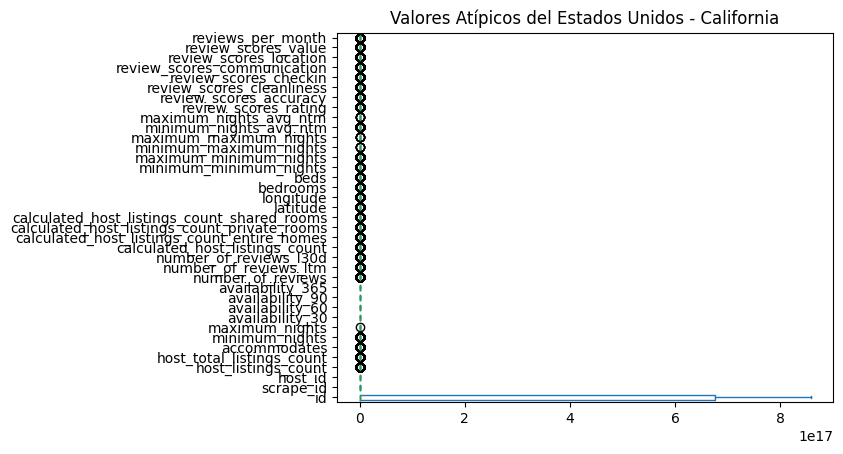

In [ ]:
fig1 = plt.figure(figsize =(15, 8))
Mexico_numeros.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Estados Unidos - California")
plt.show()

Considerando lo anterior vamos a aplicar el método para reducir esto.

In [ ]:
y=Mexico_numeros

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              1.688067e+18
scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
accommodates                                    7.000000e+00
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
availability_30                                 6.300000e+01
availability_60                                 1.095000e+02
availability_90                                 1.500000e+02
availability_365                                6.740000e+02
number_of_reviews                               1.045000e+02
number_of_reviews_ltm                           4.750000e+01
number_of_reviews_l30d                          5.000000e+00
calculated_host_listings_count                  2.350000e+0

In [ ]:
#Encontramos Ouliers
outliers= Mexico_numeros[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
Mexico_clean= Mexico_numeros[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Mexico_clean

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2056638,20230329041210,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,...,1.0,1125.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,2072354,20230329041210,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,...,3.0,1125.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,696037,20230329041210,3531879,4.0,4.0,6.0,NaN,1125.0,0,0,...,NaN,1125.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,35797,20230329041210,153786,1.0,1.0,2.0,1.0,7.0,28,58,...,1.0,7.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
4,44616,20230329041210,196253,16.0,16.0,NaN,1.0,365.0,30,59,...,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,856077453562445400,20230329041210,484538652,12.0,12.0,2.0,1.0,365.0,18,45,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24185,856087620832913758,20230329041210,501255962,1.0,1.0,4.0,1.0,365.0,29,59,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24186,856096385840740213,20230329041210,2086889,1.0,1.0,5.0,2.0,180.0,11,40,...,2.0,180.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24187,856096646292140800,20230329041210,506509461,3.0,3.0,1.0,1.0,40.0,0,29,...,1.0,1125.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70


In [ ]:
Mexico_cleanf=Mexico_clean.copy()
Mexico_cleanf=Mexico_cleanf.fillna(round(Mexico_cleanf.mean(),1))
Mexico_cleanf

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2056638,20230329041210,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,...,1.0,1125.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,2072354,20230329041210,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,...,3.0,1125.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,696037,20230329041210,3531879,4.0,4.0,6.0,1.6,1125.0,0,0,...,1.8,1125.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,35797,20230329041210,153786,1.0,1.0,2.0,1.0,7.0,28,58,...,1.0,7.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
4,44616,20230329041210,196253,16.0,16.0,2.9,1.0,365.0,30,59,...,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,856077453562445400,20230329041210,484538652,12.0,12.0,2.0,1.0,365.0,18,45,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24185,856087620832913758,20230329041210,501255962,1.0,1.0,4.0,1.0,365.0,29,59,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24186,856096385840740213,20230329041210,2086889,1.0,1.0,5.0,2.0,180.0,11,40,...,2.0,180.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24187,856096646292140800,20230329041210,506509461,3.0,3.0,1.0,1.0,40.0,0,29,...,1.0,1125.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70


<Figure size 1500x800 with 0 Axes>

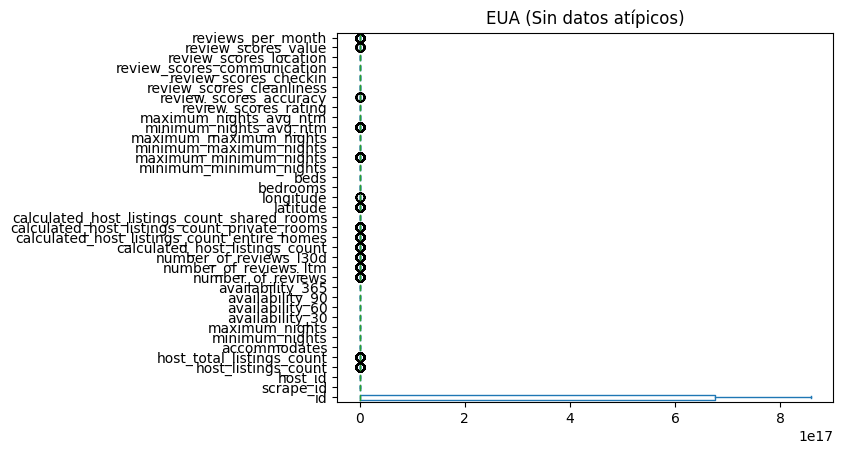

In [ ]:
fig2 = plt.figure(figsize =(15, 8))
Mexico_cleanf.plot(kind='box', vert=False)
plt.title("EUA (Sin datos atípicos)")
plt.show() #dibujamos el diagrama

Vemos que la cantidad de valores atipicos disminuyo de manera drástica en la base de datos esto dandonos a entender que limpiamos de manera adecuada los datos. Concatenamos todo el database que se tiene con los numeros y variables cualitativas

In [ ]:
Mexico_f=pd.concat([Mexico_cleanf,Mexico_cuali], axis=1)
Mexico_f

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,bathrooms,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,2056638,20230329041210,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,...,15,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,NL000000,f
1,2072354,20230329041210,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,...,1,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,NL000000,f
2,696037,20230329041210,3531879,4.0,4.0,6.0,1.6,1125.0,0,0,...,2,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,NL000000,f
3,35797,20230329041210,153786,1.0,1.0,2.0,1.0,7.0,28,58,...,1,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,2011-11-09,2023-03-26,NL000000,f
4,44616,20230329041210,196253,16.0,16.0,2.9,1.0,365.0,30,59,...,55,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,NL000000,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,856077453562445400,20230329041210,484538652,12.0,12.0,2.0,1.0,365.0,18,45,...,1,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Co...",$721.00,t,2023-03-30,2023-03-29,2023-03-29,NL000000,t
24185,856087620832913758,20230329041210,501255962,1.0,1.0,4.0,1.0,365.0,29,59,...,1,1 bath,"[""Wifi"", ""Paid parking on premises"", ""Pets all...","$1,400.00",t,2023-03-29,2023-03-29,2023-03-29,NL000000,f
24186,856096385840740213,20230329041210,2086889,1.0,1.0,5.0,2.0,180.0,11,40,...,25,2.5 baths,"[""Stainless steel oven"", ""Smoke alarm"", ""55\"" ...","$1,477.00",t,2023-03-30,2023-03-29,2023-03-29,NL000000,f
24187,856096646292140800,20230329041210,506509461,3.0,3.0,1.0,1.0,40.0,0,29,...,1,1 private bath,"[""Luggage dropoff allowed"", ""Single level home...",$305.00,t,2023-03-30,2023-03-29,2023-03-29,NL000000,t


In [ ]:
EUA_f

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,bathrooms,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169.0,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,1,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,8904.0,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,1,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,STR-0000264,f
2,21994.0,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,4,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,STR-0000264,f
3,24215.0,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,15,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,7149.0,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,1,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569.0,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,15,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$83.00,t,06/03/2023,03/02/2023,25/02/2023,2022-012006STR,f
6927,87262817.9,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,1,1 private bath,"[""Security cameras on property"", ""Self check-i...",$80.00,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6928,9835117.0,2.0,7.0,3.0,30.0,365.0,0,0,0,248,...,1,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",$175.00,f,06/03/2023,03/03/2023,03/03/2023,147904,f
6929,226555948.0,5.3,7.7,2.0,15.3,365.0,2,32,62,336,...,1,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",$40.00,t,06/03/2023,03/03/2023,03/03/2023,147904,f


In [ ]:
from google.colab import files 

EUA_f.to_csv("EUA_f.csv")
Espana_f.to_csv("Espana_f.csv")
Mexico_cleanf.to_csv("Mexico_f.csv")

files.download("EUA_f.csv")
files.download("Espana_f.csv")
files.download("Mexico_f.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Etapa 2**


#### **Extracción de Datos**

* host_acceptance_rate> 50%
* Sólo los registros con categoría “superhost”
* Los registros que no hallan verificado identidad “ not identity_verified”
* Los registro cuyo property_type = “Private room” y “Hotel room”
* Los registros que cuenten con bathroom > 1
* Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”
* Los registros cuyo review_scores_cleanliness > 4.5
* Los registros cuyo review_scores_value > 4.9
* Los registros cuya availability_365< 100
* Los registros cuya host_response_time sea “within an hour”

##### Host acceptance rate

In [ ]:
#Host acceptance rate > 50
EUA_1=EUA_f[EUA_f['host_acceptance_rate']>'50%']
EUA_1['host_acceptance_rate'].min()

'52%'

In [ ]:
#Host acceptance rate > 50
Espana_1=Espana_f[Espana_f['host_acceptance_rate']>'50%']
Espana_1['host_acceptance_rate'].min()

'51%'

In [ ]:
#Host acceptance rate > 50
Mexico_1=Mexico_f[Mexico_f['host_acceptance_rate']>'50%']
Mexico_1['host_acceptance_rate'].min()

'52%'

In [ ]:
EUA_1.to_csv("EUA_1.csv")
Espana_1.to_csv("Espana_1.csv")
Mexico_1.to_csv("Mexico_1.csv")

files.download("EUA_1.csv")
files.download("Espana_1.csv")
files.download("Mexico_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Sólo los registros con categoría “superhost”

In [ ]:
#Sólo los registros con categoría “superhost”
EUA_2=EUA_f[EUA_f['host_is_superhost']=='t']

In [ ]:
#Sólo los registros con categoría “superhost”
Espana_2=Espana_f[Espana_f['host_is_superhost']=='t']

In [ ]:
#Sólo los registros con categoría “superhost”
Mexico_2=Mexico_f[Mexico_f['host_is_superhost']=='t']

In [ ]:
EUA_2.to_csv("EUA_2.csv")
Espana_2.to_csv("Espana_2.csv")
Mexico_2.to_csv("Mexico_2.csv")

files.download("EUA_2.csv")
files.download("Espana_2.csv")
files.download("Mexico_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registros que no hallan verificado identidad “ not identity_verified”

In [ ]:
#Sólo los registros con categoría “superhost”
EUA_3=EUA_f[EUA_f['host_identity_verified']=='f']

In [ ]:
#Sólo los registros con categoría “superhost”
Espana_3=Espana_f[Espana_f['host_identity_verified']=='f']

In [ ]:
#Sólo los registros con categoría “superhost”
Mexico_3=Mexico_f[Mexico_f['host_identity_verified']=='f']

In [ ]:
EUA_3.to_csv("EUA_3.csv")
Espana_3.to_csv("Espana_3.csv")
Mexico_3.to_csv("Mexico_3.csv")

files.download("EUA_3.csv")
files.download("Espana_3.csv")
files.download("Mexico_3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registro cuyo property_type = “Private room” y “Hotel room”

In [ ]:
EUA_4= EUA_f[(EUA_f['property_type']=='Private room') | (EUA_f['property_type']== "Room in hotel")]

In [ ]:
Espana_4= Espana_f[(Espana_f['property_type']=='Private room') | (Espana_f['property_type']== "Room in hotel")]

In [ ]:
Mexico_4= Mexico_f[(Mexico_f['property_type']=='Private room') | (Mexico_f['property_type']== "Room in hotel")]

In [ ]:
EUA_4.to_csv("EUA_4.csv")
Espana_4.to_csv("Espana_4.csv")
Mexico_4.to_csv("Mexico_4.csv")

files.download("EUA_4.csv")
files.download("Espana_4.csv")
files.download("Mexico_4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registros que cuenten con bathroom > 1

Aun cuando esa columna ya le habiamos quitado las letras me las sigue marcando como str así que usaremos el otro y tomaremos esas frases que nos dicen un baño y medio baño.

In [ ]:
EUA_5= EUA_f[(EUA_f['bathrooms_text']!='Half-bath') & (EUA_f['bathrooms_text']!= "1 private bath") & (EUA_f['bathrooms_text']!= "Shared half-bath") & (EUA_f['bathrooms_text']!= "0 baths") & (EUA_f['bathrooms_text']!= "1 shared bath")&(EUA_f['bathrooms_text']!= "1 bath")&(EUA_f['bathrooms_text']!= "Private half-bath")&(EUA_f['bathrooms_text']!= "0 shared baths")]

In [ ]:
Espana_5= Espana_f[(Espana_f['bathrooms_text']!='Half-bath') & (Espana_f['bathrooms_text']!= "1 private bath") & (Espana_f['bathrooms_text']!= "Shared half-bath") & (Espana_f['bathrooms_text']!= "0 baths") & (Espana_f['bathrooms_text']!= "1 shared bath")&(Espana_f['bathrooms_text']!= "1 bath")&(Espana_f['bathrooms_text']!= "Private half-bath")&(Espana_f['bathrooms_text']!= "0 shared baths")]

In [ ]:
Mexico_5= Mexico_f[(Mexico_f['bathrooms_text']!='Half-bath') & (Mexico_f['bathrooms_text']!= "1 private bath") & (Mexico_f['bathrooms_text']!= "Shared half-bath") & (Mexico_f['bathrooms_text']!= "0 baths") & (Mexico_f['bathrooms_text']!= "1 shared bath")&(Mexico_f['bathrooms_text']!= "1 bath")&(Mexico_f['bathrooms_text']!= "Private half-bath")&(Mexico_f['bathrooms_text']!= "0 shared baths")]

In [ ]:
EUA_5.to_csv("EUA_5.csv")
Espana_5.to_csv("Espana_5.csv")
Mexico_5.to_csv("Mexico_5.csv")

files.download("EUA_5.csv")
files.download("Espana_5.csv")
files.download("Mexico_5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

In [ ]:
EUA_f['price'] = EUA_f['price'].str.replace('$', '')
EUA_f['price'] = EUA_f['price'].apply(lambda x: re.sub('[^0-9]', '', x))
EUA_f['price']=EUA_f['price'].astype(float)
EUA_6= EUA_f[(EUA_f['price']>10000) | (EUA_f['property_type']== "Entire home")]

<ipython-input-88-2b0a43d6ddb7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  EUA_f['price'] = EUA_f['price'].str.replace('$', '')


In [ ]:
Espana_f['price'] = Espana_f['price'].str.replace('$', '')
Espana_f['price'] = Espana_f['price'].apply(lambda x: re.sub('[^0-9]', '', x))
Espana_f['price']=Espana_f['price'].astype(float)
Espana_6= Espana_f[(Espana_f['price']>10000) | (Espana_f['property_type']== "Entire home")]

<ipython-input-89-4498190107f6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Espana_f['price'] = Espana_f['price'].str.replace('$', '')


In [ ]:
Mexico_f['price'] = Mexico_f['price'].str.replace('$', '')
Mexico_f['price'] = Mexico_f['price'].apply(lambda x: re.sub('[^0-9]', '', x))
Mexico_f['price']=Mexico_f['price'].astype(float)
Mexico_6= Mexico_f[(Mexico_f['price']>10000) | (Mexico_f['property_type']== "Entire home")]

<ipython-input-90-36cf19ae5e3c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Mexico_f['price'] = Mexico_f['price'].str.replace('$', '')


In [ ]:
EUA_6.to_csv("EUA_6.csv")
Espana_6.to_csv("Espana_6.csv")
Mexico_6.to_csv("Mexico_6.csv")

files.download("EUA_6.csv")
files.download("Espana_6.csv")
files.download("Mexico_6.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registros cuyo review_scores_cleanliness > 4.5

In [ ]:
EUA_7= EUA_f[(EUA_f['review_scores_cleanliness']>4.5)]

In [ ]:
Espana_7= Espana_f[(Espana_f['review_scores_cleanliness']>4.5)]

In [ ]:
Mexico_7= Mexico_f[(Mexico_f['review_scores_cleanliness']>4.5)]

In [ ]:
EUA_7.to_csv("EUA_7.csv")
Espana_7.to_csv("Espana_7.csv")
Mexico_7.to_csv("Mexico_7.csv")

files.download("EUA_7.csv")
files.download("Espana_7.csv")
files.download("Mexico_7.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registros cuyo review_scores_value > 4.9

In [ ]:
EUA_8= EUA_f[(EUA_f['review_scores_value']>4.9)]

In [ ]:
Espana_8= Espana_f[(Espana_f['review_scores_value']>4.9)]

In [ ]:
Mexico_8= Mexico_f[(Mexico_f['review_scores_value']>4.9)]

In [ ]:
EUA_8.to_csv("EUA_8.csv")
Espana_8.to_csv("Espana_8.csv")
Mexico_8.to_csv("Mexico_8.csv")

files.download("EUA_8.csv")
files.download("Espana_8.csv")
files.download("Mexico_8.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registros cuya availability_365< 100

In [ ]:
EUA_9= EUA_f[(EUA_f['availability_365']<100)]

In [ ]:
Espana_9= Espana_f[(Espana_f['availability_365']<100)]

In [ ]:
Mexico_9= Mexico_f[(Mexico_f['availability_365']<100)]

In [ ]:
EUA_9.to_csv("EUA_9.csv")
Espana_9.to_csv("Espana_9.csv")
Mexico_9.to_csv("Mexico_9.csv")

files.download("EUA_9.csv")
files.download("Espana_9.csv")
files.download("Mexico_9.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Los registros cuya host_response_time sea “within an hour”

In [ ]:
EUA_10=EUA_f[EUA_f['host_response_time']=='within an hour']

In [ ]:
Espana_10=Espana_f[Espana_f['host_response_time']=='within an hour']

In [ ]:
Mexico_10=Mexico_f[Mexico_f['host_response_time']=='within an hour']

In [ ]:
EUA_10.to_csv("EUA_10.csv")
Espana_10.to_csv("Espana_10.csv")
Mexico_10.to_csv("Mexico_10.csv")

files.download("EUA_10.csv")
files.download("Espana_10.csv")
files.download("Mexico_10.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Etapa 3**

Desarrollar un análisis comparativo respecto a las 3 ciudades elegidas para el servicio Airbnb sobre las siguientes variables:

Para esta etapa descargamos la biblioteca de tablas de frecuencia para poder hacer todos los calculos cuantitativos de las variables cualitativas.

#### **host_response_time**



In [ ]:
EUA_tabla1= freq_tbl(EUA_f['host_response_time'])
EUA_tabla1_index= EUA_tabla1.set_index('host_response_time')
#tabla1
EUA_tabla1_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,4914,0.708989,0.708989
within a few hours,1309,0.188862,0.897850
within a day,530,0.076468,0.974318
a few days or more,178,0.025682,1.000000


In [ ]:
Espana_tabla1= freq_tbl(Espana_f['host_response_time'])
Espana_tabla1_index= Espana_tabla1.set_index('host_response_time')
#tabla1
Espana_tabla1_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,13709,0.698050,0.698050
within a few hours,3041,0.154845,0.852895
within a day,2426,0.123530,0.976424
a few days or more,463,0.023576,1.000000


In [ ]:
Mexico_tabla1= freq_tbl(Mexico_f['host_response_time'])
Mexico_tabla1_index= Mexico_tabla1.set_index('host_response_time')
#tabla1
Mexico_tabla1_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,19414,0.802596,0.802596
within a few hours,2281,0.094299,0.896895
within a day,1661,0.068668,0.965563
a few days or more,833,0.034437,1.000000


Text(0.5, 1.0, 'Tiempo de respuesta del Host en California')

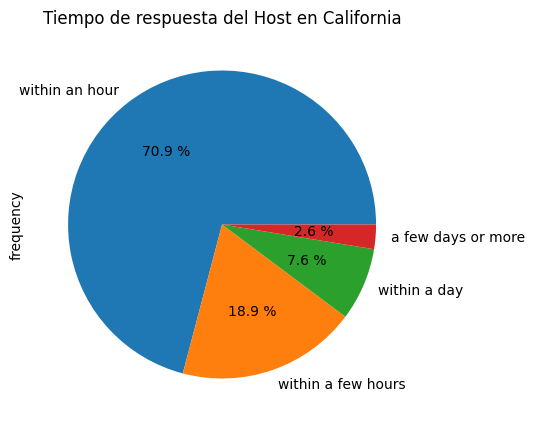

In [ ]:
EUA_tabla1_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Tiempo de respuesta del Host en California')

Text(0.5, 1.0, 'Tiempo de respuesta del Host en Girona')

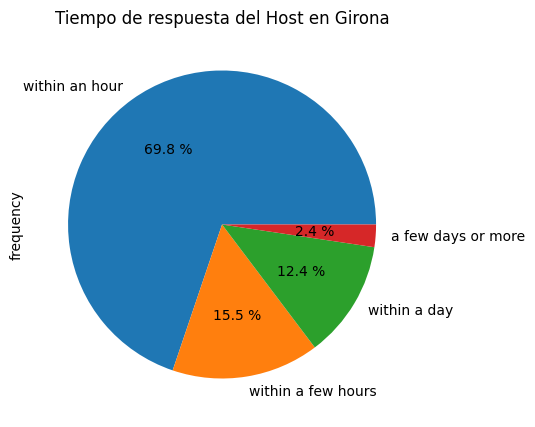

In [ ]:
Espana_tabla1_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Tiempo de respuesta del Host en Girona')

Text(0.5, 1.0, 'Tiempo de respuesta del Host en México')

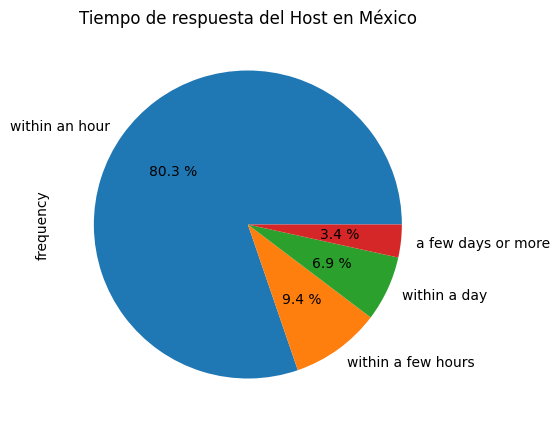

In [ ]:
Mexico_tabla1_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Tiempo de respuesta del Host en México')

Como podemos ver las respuestas el mayor porcentaje de tiempo en que la respuesta es dentro de una hora es en el DF. Esto nos ndica que probablemente tenemos mejor servicios al cliente que en Girona y en California, esto considerando que le el valor que más importa tenemos mejor calificación, mientras que en el los demás podemos decir que el lugar con peor respuesta a los clientes de Airbnb es en Girona, España.

In [ ]:
EUA_tabla2= freq_tbl(EUA_f['property_type'])
EUA_tabla2= EUA_tabla2[EUA_tabla2['property_type']>30]
EUA_tabla2_index= EUA_tabla2.set_index('property_type')
#EUA_tabla2
EUA_tabla2_index

'No categorical variables to analyze.'

In [ ]:
Espana_tabla4= freq_tbl(Espana_f['property_type'])
Espana_tabla4= Espana_tabla4[Espana_tabla4['frequency']>30]
Espana_tabla4_index= Espana_tabla4.set_index('property_type')
#tabla4
Espana_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,9328,0.474973,0.474973
Entire home,3699,0.188350,0.663323
Entire villa,1714,0.087275,0.750598
Entire condo,1400,0.071287,0.821885
Entire cottage,549,0.027955,0.849840
Entire townhouse,453,0.023066,0.872906
Entire loft,217,0.011049,0.883955
Room in hotel,184,0.009369,0.893325
Private room in bed and breakfast,179,0.009115,0.902439


In [ ]:
Mexico_tabla4= freq_tbl(Mexico_f['property_type'])
Mexico_tabla4= Mexico_tabla4[Mexico_tabla4['frequency']>30]
Mexico_tabla4_index= Mexico_tabla4.set_index('property_type')
#tabla4
Mexico_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,8121,0.335731,0.335731
Entire condo,3363,0.139030,0.474761
Private room in rental unit,2853,0.117946,0.592707
Private room in home,2007,0.082972,0.675679
Entire loft,1584,0.065484,0.741163
Entire serviced apartment,1066,0.044070,0.785233
Private room in condo,917,0.037910,0.823143
Entire home,660,0.027285,0.850428
Room in hotel,381,0.015751,0.866179


Text(0, 0.5, 'Frecuencia')

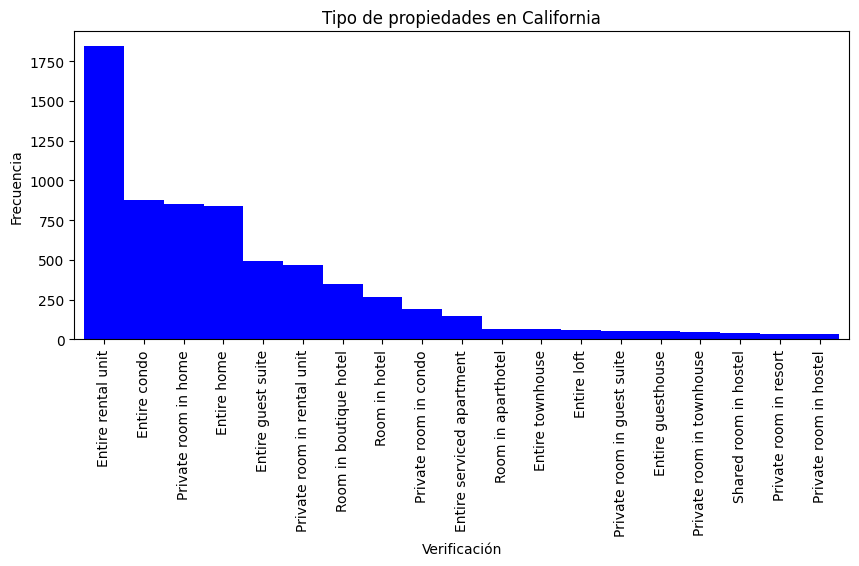

In [ ]:
EUA_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'blue')
plt.title('Tipo de propiedades en California')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

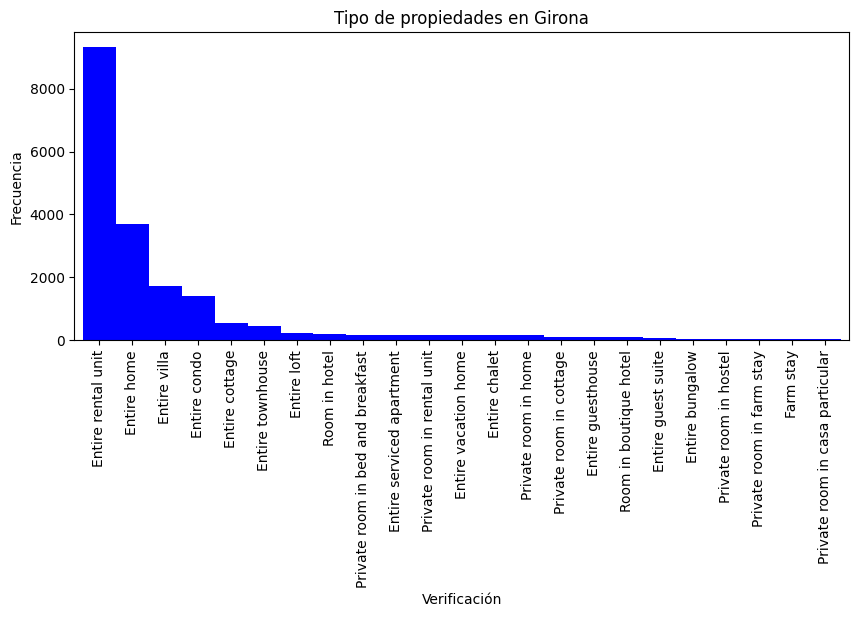

In [ ]:
Espana_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'blue')
plt.title('Tipo de propiedades en Girona')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

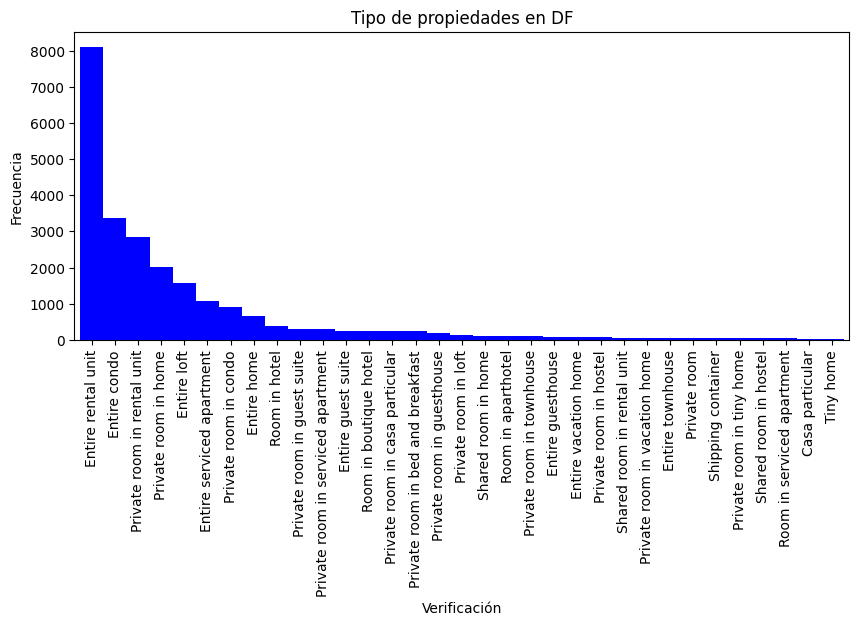

In [ ]:
Mexico_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'blue')
plt.title('Tipo de propiedades en DF')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Podemos ver que en el DF y en Girona tenemos alrededor de 8000 o más del mismo y más repetido tipo de propiedad (este es renta de toda la propiedad). En México vemos muchos más tipos de rentas aún y cuando solamente elegí los tipos de propiedad con más de 35 selecciones en las tres bases de datos. en segundo lugar tenemos todo el condominimio en California y Df mientras que en españa es tttoda la casa.  

Vemos una tendencia en todas las bases de datos que en la plataforma de Airbnb de manera global las rentas más repetidas son las de propiedades enteras o cuartos privados y posteriormente otro tipos de propiedades.

#### **review_scores_value**



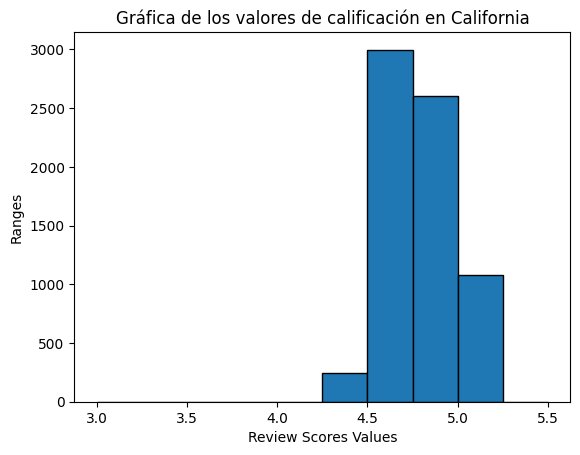

In [ ]:
scores = EUA_f['review_scores_value']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black')

plt.xlabel('Review Scores Values')
plt.ylabel('Ranges')
plt.title('Gráfica de los valores de calificación en California')

plt.show()

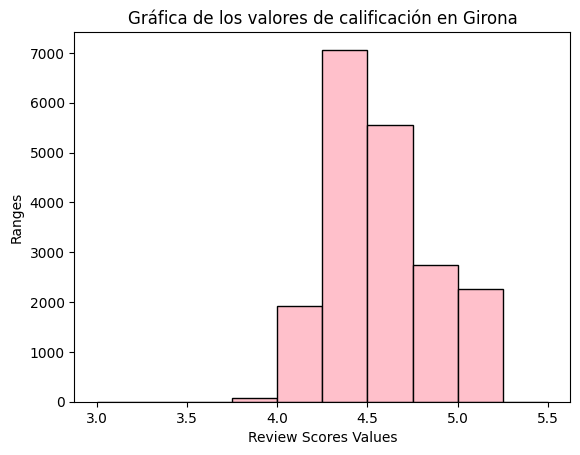

In [ ]:
scores = Espana_f['review_scores_value']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color='pink')

plt.xlabel('Review Scores Values')
plt.ylabel('Ranges')
plt.title('Gráfica de los valores de calificación en Girona')

plt.show()

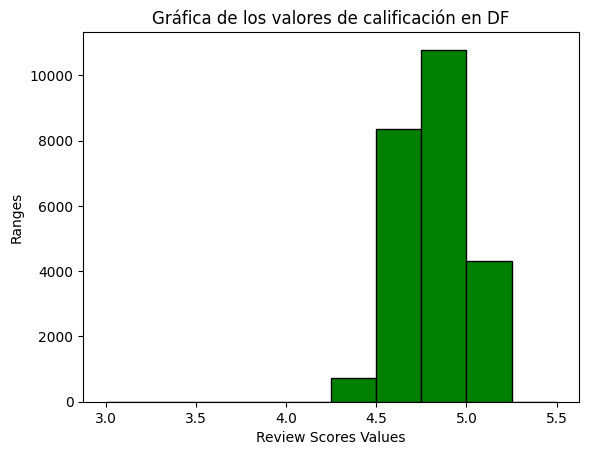

In [ ]:
scores = Mexico_f['review_scores_value']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color='green')

plt.xlabel('Review Scores Values')
plt.ylabel('Ranges')
plt.title('Gráfica de los valores de calificación en DF')

plt.show()

En este caso especificamente no podemos usar las tablas de frecuencia, con ese tipo de comandos considerando que las variables dentro de la columna son de tipo númerico, mientras que lo que se busca es que sean de tipo alfabetico o string. Por eso utilizamos comandos para bases de datos númericas con gráficos. 

Podemos ver que el que se tiene mejor calificación es Mexico, después tenemos EUA y finalmente esta España con las mejores calificaciones. En España tenemos mucha más dispersión de las calificaciones en los rangos pero realmente las que se tienen mejores calificaciones esta en la ciudad de Mexico

#### **host_identity_verified**



In [ ]:
EUA_tabla3= freq_tbl(EUA_f['host_identity_verified'])
EUA_tabla3_index= EUA_tabla3.set_index('host_identity_verified')
#tabla1
EUA_tabla3_index

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,6104,0.880681,0.880681
f,827,0.119319,1.000000


In [ ]:
Espana_tabla3= freq_tbl(Espana_f['host_identity_verified'])
Espana_tabla3_index= Espana_tabla3.set_index('host_identity_verified')
#tabla1
Espana_tabla3_index

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,17371,0.884516,0.884516
f,2268,0.115484,1.000000


In [ ]:
Mexico_tabla3= freq_tbl(Mexico_f['host_identity_verified'])
Mexico_tabla3_index= Mexico_tabla3.set_index('host_identity_verified')
#tabla1
Mexico_tabla3_index

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,22266,0.920501,0.920501
f,1923,0.079499,1.000000


Text(0.5, 1.0, 'Host Verificado en California')

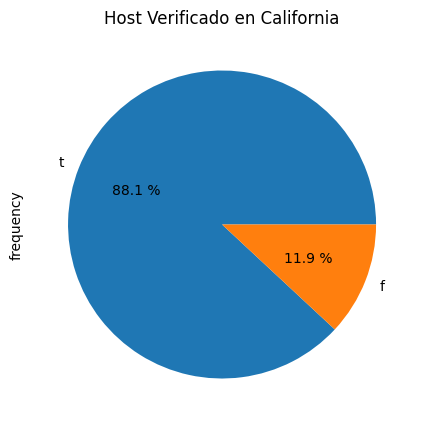

In [ ]:
EUA_tabla3_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Host Verificado en California')

Text(0, 0.5, 'Frecuencia')

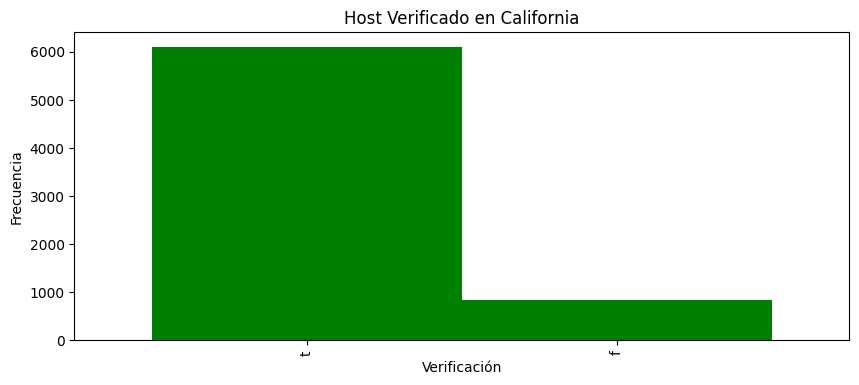

In [ ]:
EUA_tabla3_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'green')
plt.title('Host Verificado en California')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Host verificado en Girona')

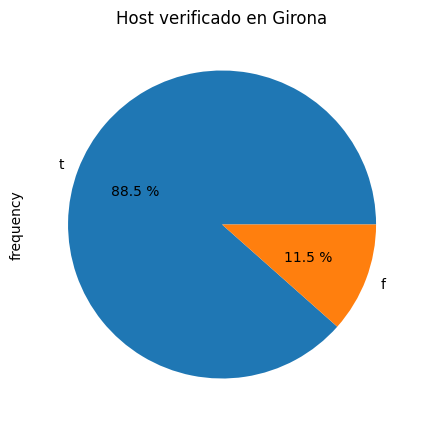

In [ ]:
Espana_tabla3_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Host verificado en Girona')

Text(0, 0.5, 'Frecuencia')

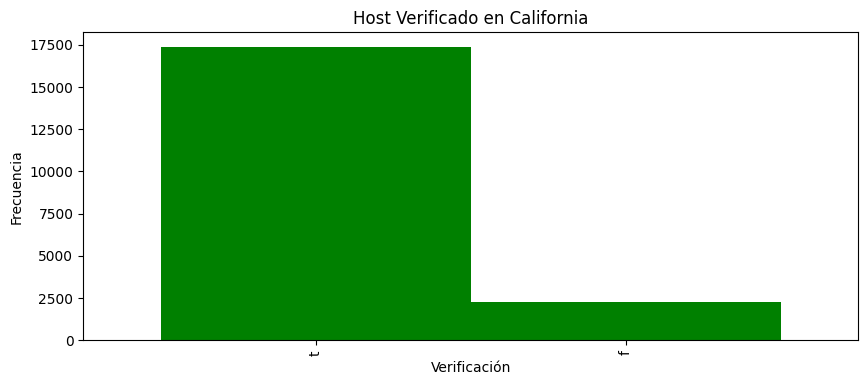

In [ ]:
Espana_tabla3_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'green')
plt.title('Host Verificado en California')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Host verificado en México')

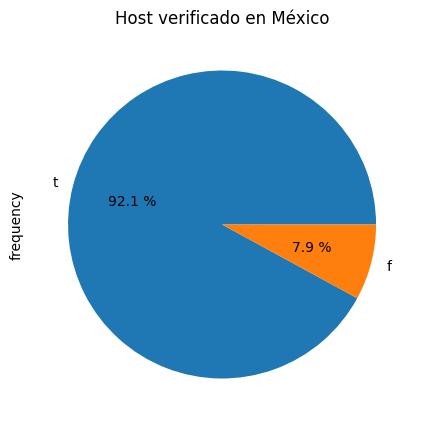

In [ ]:
Mexico_tabla3_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Host verificado en México')

Text(0, 0.5, 'Frecuencia')

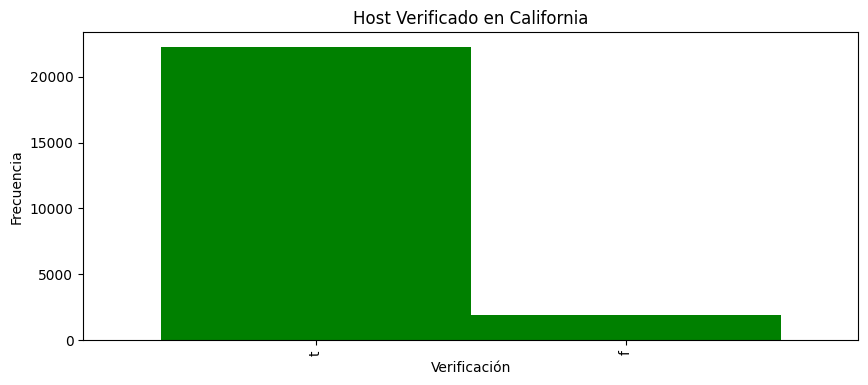

In [ ]:
Mexico_tabla3_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'green')
plt.title('Host Verificado en California')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Viendo las dos gráficas podemos ver que en cuestion de porcentaje así como de número en el DF tenemso mayor número de hosts verificados, posteriormente tenemos a Girona Espana y despues California, por más que hice las dos gráficas para ver la comparación con los números de la muestra de cada una de las bases de datos aún así en México se tiene mayor números de verificaaciones así como de porcentajes.

#### **property_type**



In [ ]:
EUA_tabla4= freq_tbl(EUA_f['property_type'])
EUA_tabla4= EUA_tabla4[EUA_tabla4['frequency']>30]
EUA_tabla4_index= EUA_tabla4.set_index('property_type')
#tabla1
EUA_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,1845,0.266195,0.266195
Entire condo,879,0.126822,0.393017
Private room in home,852,0.122926,0.515943
Entire home,839,0.121050,0.636993
Entire guest suite,495,0.071418,0.708411
Private room in rental unit,470,0.067811,0.776223
Room in boutique hotel,352,0.050786,0.827009
Room in hotel,265,0.038234,0.865243
Private room in condo,192,0.027702,0.892945


In [ ]:
Espana_tabla4= freq_tbl(Espana_f['property_type'])
Espana_tabla4= Espana_tabla4[Espana_tabla4['frequency']>30]
Espana_tabla4_index= Espana_tabla4.set_index('property_type')
#tabla4
Espana_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,9328,0.474973,0.474973
Entire home,3699,0.188350,0.663323
Entire villa,1714,0.087275,0.750598
Entire condo,1400,0.071287,0.821885
Entire cottage,549,0.027955,0.849840
Entire townhouse,453,0.023066,0.872906
Entire loft,217,0.011049,0.883955
Room in hotel,184,0.009369,0.893325
Private room in bed and breakfast,179,0.009115,0.902439


In [ ]:
Mexico_tabla4= freq_tbl(Mexico_f['property_type'])
Mexico_tabla4= Mexico_tabla4[Mexico_tabla4['frequency']>30]
Mexico_tabla4_index= Mexico_tabla4.set_index('property_type')
#tabla4
Mexico_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,8121,0.335731,0.335731
Entire condo,3363,0.139030,0.474761
Private room in rental unit,2853,0.117946,0.592707
Private room in home,2007,0.082972,0.675679
Entire loft,1584,0.065484,0.741163
Entire serviced apartment,1066,0.044070,0.785233
Private room in condo,917,0.037910,0.823143
Entire home,660,0.027285,0.850428
Room in hotel,381,0.015751,0.866179


Text(0, 0.5, 'Frecuencia')

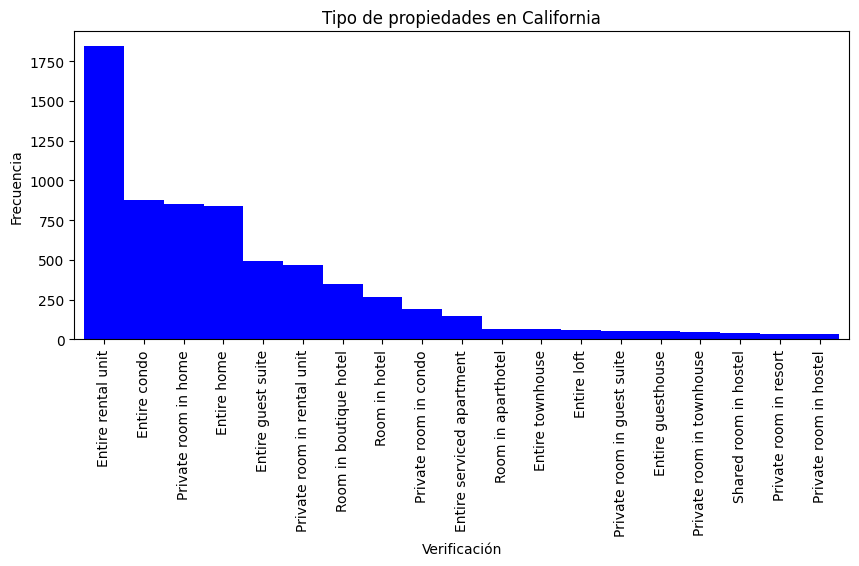

In [ ]:
EUA_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'blue')
plt.title('Tipo de propiedades en California')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

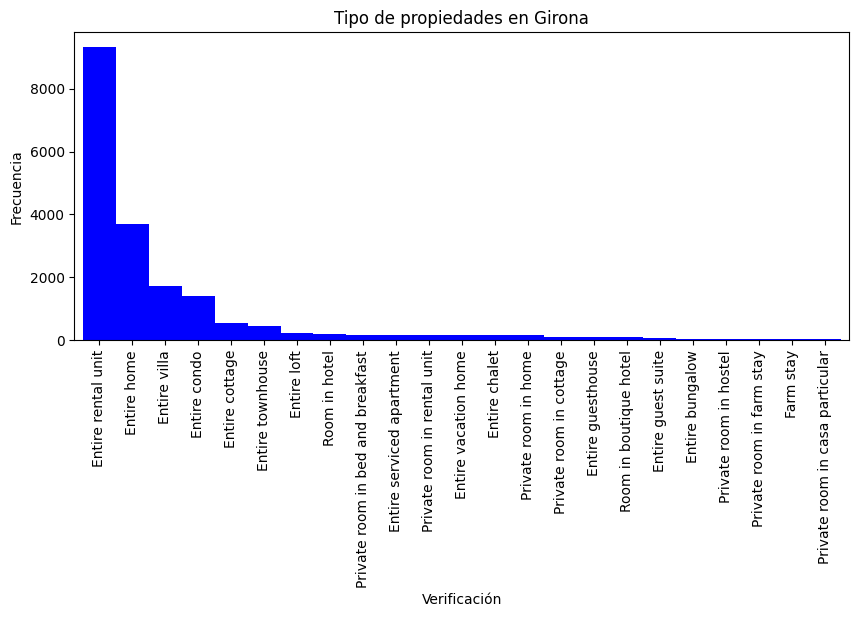

In [ ]:
Espana_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'blue')
plt.title('Tipo de propiedades en Girona')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

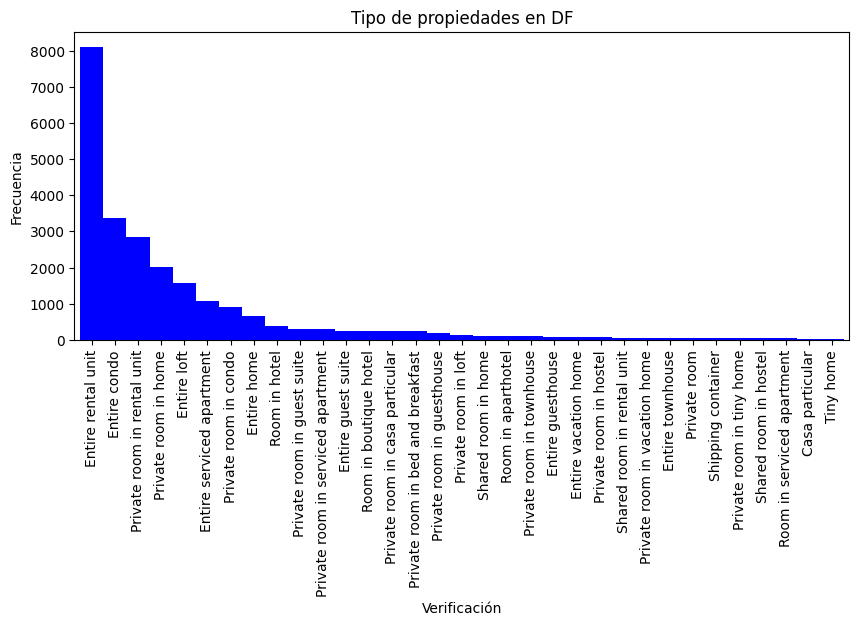

In [ ]:
Mexico_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'blue')
plt.title('Tipo de propiedades en DF')
plt.xlabel('Verificación')
plt.ylabel('Frecuencia')

Podemos ver que en el DF y en Girona tenemos alrededor de 8000 o más del mismo y más repetido tipo de propiedad (este es renta de toda la propiedad). En México vemos muchos más tipos de rentas aún y cuando solamente elegí los tipos de propiedad con más de 35 selecciones en las tres bases de datos. en segundo lugar tenemos todo el condominimio en California y Df mientras que en españa es tttoda la casa.  

Vemos una tendencia en todas las bases de datos que en la plataforma de Airbnb de manera global las rentas más repetidas son las de propiedades enteras o cuartos privados y posteriormente otro tipos de propiedades.

#### **review_scores_location**

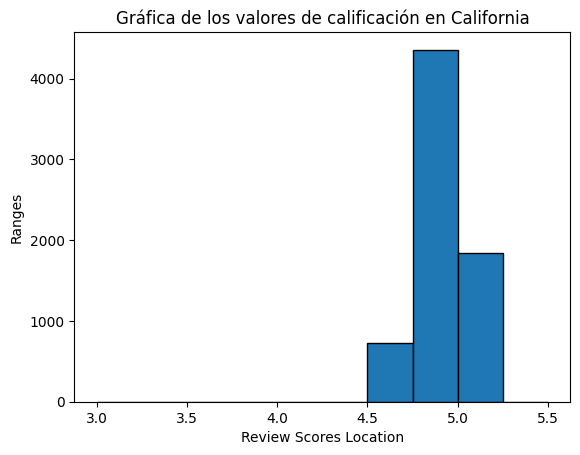

In [ ]:
scores = EUA_f['review_scores_location']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black')

plt.xlabel('Review Scores Location')
plt.ylabel('Ranges')
plt.title('Gráfica de los valores de calificación en California')

plt.show()

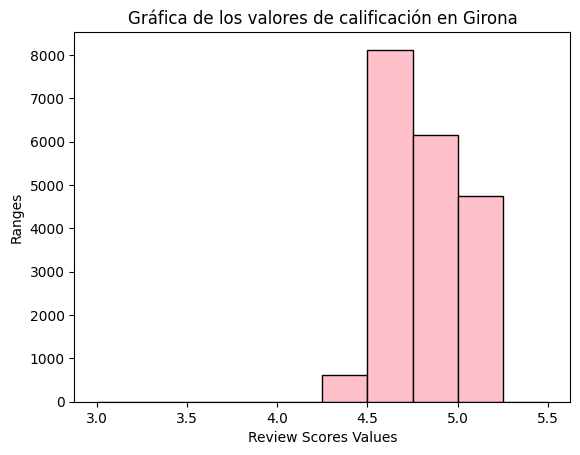

In [ ]:
scores = Espana_f['review_scores_location']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color='pink')

plt.xlabel('Review Scores Values')
plt.ylabel('Ranges')
plt.title('Gráfica de los valores de calificación en Girona')

plt.show()

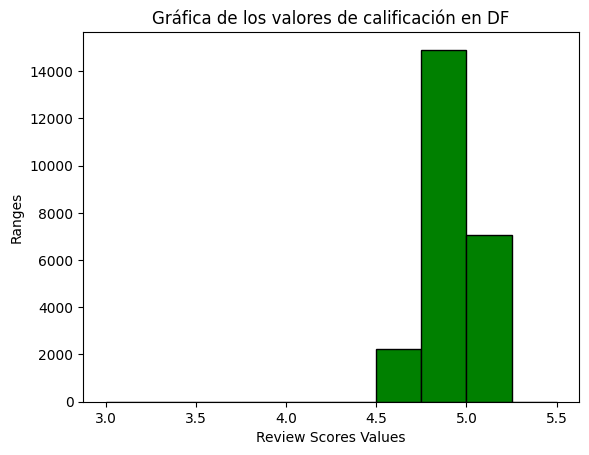

In [ ]:
scores = Mexico_f['review_scores_location']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color='green')

plt.xlabel('Review Scores Values')
plt.ylabel('Ranges')
plt.title('Gráfica de los valores de calificación en DF')

plt.show()

Como podemos ver en Mexico tenemos mejor desempeño en cuestión de las ubicaciones así como California. Es importante recalcar que en cuestión de la califiación tenemos que tener en cuenta la muestra que se tiene de cada una de la base de datos.